<h1 align=center><font size = 5><b>NBA Application</b> <b>Programming</b> <b>Interface</b> (API)</font></h1>

## Table of Contents
<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="#ref1">Explore data about NBA Teams</a></li>
<li><a href="#ref1">REST APIs Basics  </a></li>
<li><a href="#ref2">Quiz on Tuples</a></li>

<p></p>
</div>

<hr>

**You will need to run this code if you do not have the NBA API package installed.**
```python
!pip install nba_api --user
```

In [1]:
# Import all libraries for this project
import pandas as pd
import matplotlib.pyplot as plt

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder

from folium import Map
from folium import CircleMarker

If you would like more information about the NBA API please click on this [LINK](https://pypi.org/project/nba-api/).

<h2 id="ref1">Explore information about NBA Teams</h2>

Teams is a static library meaning this data is embedded in the NBA API package and will be updated as necessary.
The method <code>get_teams()</code> returns a list of dictionaries  the dictionary key id has a unique identifier for each team as a value

In [5]:
nba_teams = teams.get_teams()

We will display the first five rows.

In [6]:
nba_teams[:5]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966}]

To make things easier, we can convert the nba team dictionary to a dataframe.

In [7]:
df_teams = pd.DataFrame(nba_teams)
df_teams.set_index('id', inplace = True) # set index to team ID
df_teams

,full_name,abbreviation,nickname,city,state,year_founded
id,,,,,,
1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966
1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980
1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976
1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946
1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967


In [8]:
# Create location column based of a concatenation of state and city
df_teams['location'] = df_teams['city'] + ', ' + df_teams['state'].copy()
df_teams

,full_name,abbreviation,nickname,city,state,year_founded,location
id,,,,,,,
1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949,"Atlanta, Atlanta"
1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946,"Boston, Massachusetts"
1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970,"Cleveland, Ohio"
1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002,"New Orleans, Louisiana"
1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966,"Chicago, Illinois"
1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980,"Dallas, Texas"
1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976,"Denver, Colorado"
1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946,"Golden State, California"
1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967,"Houston, Texas"


In [9]:
# Replace values in location column
df_teams.at[1610612737, 'location'] = "Atlanta, Georgia"
df_teams.at[1610612744, 'location'] = "San Francisco, California"
df_teams.at[1610612750, 'location'] = "Minneapolis, Minnesota"
df_teams.at[1610612754, 'location'] = "Indianapolis, Indiana"
df_teams.at[1610612762, 'location'] = "Salt Lake City, Utah"
df_teams.at[1610612764, 'location'] = "Washington, D.C."

In [10]:
# Locator for Nominatim Geocoding service
geolocator = Nominatim(user_agent = 'myGeocoder')
geocode = RateLimiter(geolocator.geocode, min_delay_seconds = 1) # used to delay between geocoding calls

In [12]:
# Create address column by applying Geocode on NBA locations
df_teams['address'] = df_teams['location'].apply(geocode)

In [13]:
# Create column for address coordinates for NBA cities
df_teams['point'] = df_teams['address'].apply(lambda loc: tuple(loc.point) if loc else None)
df_teams

,full_name,abbreviation,nickname,city,state,year_founded,location,address,point
id,,,,,,,,,
1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949,"Atlanta, Georgia","(Atlanta, Fulton County, Georgia, United State...","(33.7490987, -84.3901849, 0.0)"
1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946,"Boston, Massachusetts","(Boston, Suffolk County, Massachusetts, United...","(42.3602534, -71.0582912, 0.0)"
1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970,"Cleveland, Ohio","(Cleveland, Cuyahoga County, Ohio, United Stat...","(41.5051613, -81.6934446, 0.0)"
1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002,"New Orleans, Louisiana","(New Orleans, Orleans Parish, Louisiana, Unite...","(29.9499323, -90.0701156, 0.0)"
1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966,"Chicago, Illinois","(Chicago, Cook County, Illinois, United States...","(41.8755616, -87.6244212, 0.0)"
1610612742,Dallas Mavericks,DAL,Mavericks,Dallas,Texas,1980,"Dallas, Texas","(Dallas, Dallas County, Texas, United States o...","(32.7762719, -96.7968559, 0.0)"
1610612743,Denver Nuggets,DEN,Nuggets,Denver,Colorado,1976,"Denver, Colorado","(Denver, Denver County, Colorado, United State...","(39.7392364, -104.9848623, 0.0)"
1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946,"San Francisco, California","(San Francisco, San Francisco City and County,...","(37.7790262, -122.4199061, 0.0)"
1610612745,Houston Rockets,HOU,Rockets,Houston,Texas,1967,"Houston, Texas","(Houston, Harris County, Texas, 77002-5902, Un...","(29.7589382, -95.3676974, 0.0)"


In [14]:
# Base map of the United States
us_map = Map(location = [39.828453, -98.578986], 
             tiles = 'cartodbpositron', 
             zoom_start = 3, min_zoom = 3, max_zoom = 3, zoom_control = False) # Set and disable zoom

# Plot NBA cities on US map
df_teams.apply(lambda row : CircleMarker(location = [row['point'][0], row['point'][1]],
                                         radius = 2,
                                         tooltip = row['location']).add_to(us_map), axis = 1)
us_map # display map

**NBA Map Findings**

The most populated states such as California, Texas and New York have multiple teams. There are no teams in the north central part of the United States. There are a cluster of teams located near the Great Lakes region this could be because these states are historical known for basketball.

In [15]:
df_teams['decade'] = (df_teams['year_founded'] // 10) * 10
decades = df_teams['decade'].value_counts()
missing_decades = pd.Series([0], index = [1950], name = 'decade')
nba_decades = decades.append(missing_decades)

Text(0.5, 0, 'Decade')

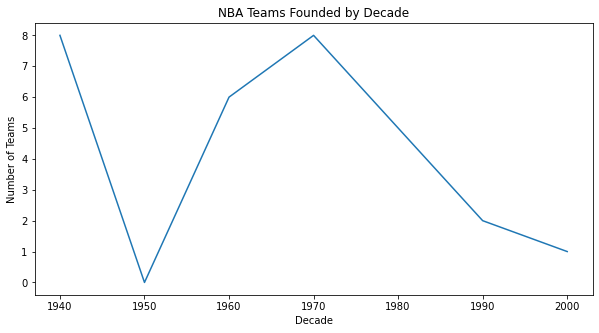

In [16]:
nba_decades.sort_index(inplace = True)
ax = nba_decades.plot(kind = 'line', 
                 figsize = (10, 5), 
                 title = 'NBA Teams Founded by Decade')
ax.set_ylabel("Number of Teams")
ax.set_xlabel("Decade")

**NBA Line Chart Findings**

There was an uptick in expansion from 1960 - 1980. No teams were founded in the 1950s.

The function "League Game Finder " will make an API call, its in the module <code>stats.endpoints</code> 

In [ ]:
from nba_api.stats.endpoints import leaguegamefinder

The parameter <code>team_id_nullable</code> is the unique ID for the warriors. Under the hood, the NBA API is making a HTTP request.  
The information requested is provided and is transmitted via an HTTP response this is assigned to the object <code>gamefinder</code>.

In [ ]:
# Since https://stats.nba.com does lot allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is comment out, you can run it on jupyter labs on your own computer.
# gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=id_warriors)

we can see the json file by running the following line of code. 

In [ ]:
# Since https://stats.nba.com does lot allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is comment out, you can run it on jupyter labs on your own computer.
# gamefinder.get_json()

The game finder object has a method <code>get_data_frames()</code>, that returns a dataframe.  If we view the dataframe, we can see it contains information about all the games the Warriors played.  The <code>PLUS_MINUS</code> column contains information on the score, if the value is negative the Warriors lost by that many points, if the value is positive, the warriors one by that amount of points. The column <code>MATCHUP </code>had the team the Warriors were playing, GSW stands for golden state and TOR means Toronto Raptors; <code>vs</code> signifies it was a home game and the <code>@ </code>symbol means an away game.

In [ ]:
# Since https://stats.nba.com does lot allow api calls from Cloud IPs and Skills Network Labs uses a Cloud IP.
# The following code is comment out, you can run it on jupyter labs on your own computer.
# games = gamefinder.get_data_frames()[0]
# games.head()

you can download the dataframe from the API call for Golden State and run the rest like a video.

In [ ]:
! wget https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/Chapter%205/Labs/Golden_State.pkl

In [ ]:
file_name = "Golden_State.pkl"
games = pd.read_pickle(file_name)
games.head()

We can create two dataframes, one  for the games that the Warriors faced the raptors at home and the second for away games.

In [ ]:
games_home=games [games ['MATCHUP']=='GSW vs. TOR']
games_away=games [games ['MATCHUP']=='GSW @ TOR']

We can calculate the mean for the column  <code>PLUS_MINUS</code> for the dataframes  <code>games_home</code> and <code> games_away</code>:

In [ ]:
games_home.mean()['PLUS_MINUS']

In [ ]:
games_away.mean()['PLUS_MINUS']

We can plot out the <code>PLUS MINUS</code> column for  for the dataframes  <code>games_home</code> and <code> games_away</code>.
We see the warriors played better at home.

In [ ]:
fig, ax = plt.subplots()

games_away.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()